In [67]:
from pycaret.regression import *
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import *
from dateutil.parser import parse
from pandas_profiling import ProfileReport

data = pd.read_csv('ai-fall20/4. Feature Eng/08. Date Enc/3. Exercise/daily-temperatures.csv')

data.Date = data.Date.apply(lambda x: pd.to_datetime(x,
    format='%Y-%m-%dT',
    errors='coerce'))

In [4]:
profile = ProfileReport(data, title='Temp Report', explorative = True)
profile

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [68]:
data['year'] = data.Date.dt.year
data.head()



,Date,Temp,year
0,1981-01-01,20.7,1981
1,1981-01-02,17.9,1981
2,1981-01-03,18.8,1981
3,1981-01-04,14.6,1981
4,1981-01-05,15.8,1981


In [69]:
train = data[data["year"] < 1990]
train = train[train['Temp'] < 25]
train = train[train['Temp'] > 0.2]
test = data[data["year"] == 1990]

In [21]:
test.tail()

,Date,Temp,year
3645,1990-12-27,14.0,1990
3646,1990-12-28,13.6,1990
3647,1990-12-29,13.5,1990
3648,1990-12-30,15.7,1990
3649,1990-12-31,13.0,1990


In [23]:
train.tail()

,Date,Temp,year
3280,1989-12-27,13.3,1989
3281,1989-12-28,11.7,1989
3282,1989-12-29,10.4,1989
3283,1989-12-30,14.4,1989
3284,1989-12-31,12.7,1989


In [70]:
train = train.drop('year', axis=1)
test = test.drop('year', axis=1)


In [71]:
test.head(1)

,Date,Temp
3285,1990-01-01,14.8


In [72]:
train = train.rename(columns={'Date':'ds','Temp':'y'})
test = test.rename(columns={'Date':'ds','Temp':'y'})

In [107]:
from fbprophet import Prophet
pr = Prophet(changepoint_prior_scale=0.1)

results = pr.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [108]:
verify = test.drop('y', axis=1)

In [109]:
forecast = pr.predict(verify)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

            ds       yhat  yhat_lower  yhat_upper
0   1990-01-01  14.719736   11.429522   18.259666
1   1990-01-02  14.900984   11.546603   18.521113
2   1990-01-03  14.937852   11.335226   18.309730
3   1990-01-04  14.845021   11.363591   18.073092
4   1990-01-05  14.934111   11.761851   18.527129
5   1990-01-06  14.972652   11.516435   18.435814
6   1990-01-07  14.857785   11.179445   18.488075
7   1990-01-08  15.067618   11.586493   18.615419
8   1990-01-09  15.220084   11.688482   18.616453
9   1990-01-10  15.224823   11.692794   18.624256
10  1990-01-11  15.097268   11.492766   18.655640
11  1990-01-12  15.149876   11.659455   18.667768
12  1990-01-13  15.151069   11.713559   18.509885
13  1990-01-14  14.998918   11.501425   18.316711
14  1990-01-15  15.172462   11.606098   18.653048
15  1990-01-16  15.290553   11.901799   18.697799
16  1990-01-17  15.263701   11.595628   18.751890
17  1990-01-18  15.108146   11.355205   18.474075
18  1990-01-19  15.137053   11.705266   18.688008


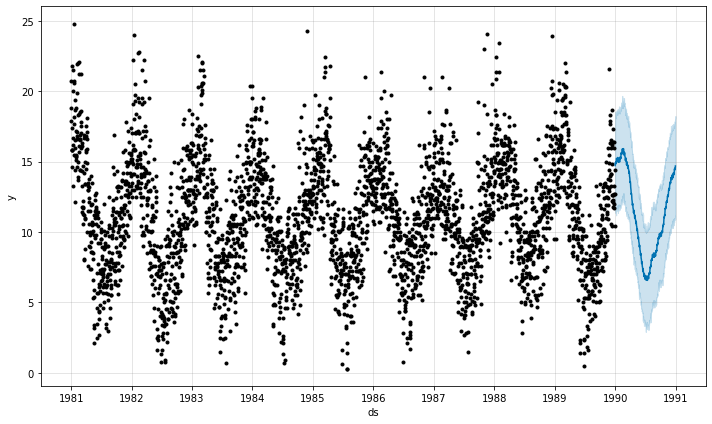

In [110]:
from matplotlib import pyplot

pr.plot(forecast)

pyplot.show()

In [105]:
from sklearn.metrics import mean_absolute_error

y_true = test['y']
y_pred = forecast['yhat']
print(len(y_true))
print(len(y_pred))

365
365


In [113]:
import math
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % math.sqrt(mae))

MAE: 1.390
